# Deep Reinforcement Learning

## 一、强化学习基础

强化学习（Reinforcement Learning, RL）的起源可以追溯到20世纪初期，其核心思想深受心理学中行为主义和控制论中最优控制理论的影响。阿尔伯塔大学的Richard S. Sutton教授在RL领域做出了奠基性的贡献。

**思想假设：**
RL的学习过程可以类比为心理学中的行为主义，即通过**试错（trial and error）**，或者**搜索与记忆（search and memory）**来学习。这与桑代克（Thorndike）在1911年提出的**效果律（Law of Effect）**相符，即如果一个行为导致了满意的结果，那么该行为在未来出现的可能性会增加；如果导致了不满意的结果，则会减少。

**模型求解：**
在控制学中，RL可以被视为**最优控制理论（optimal control theory）**的应用。通过**价值函数（value functions）**和**动态规划（dynamic programming）**来寻找最优策略。一些关键的理论基础包括：
*   **贝尔曼方程（Bellman equation）**：由Richard Bellman在1957年提出，描述了在给定策略下，当前状态的价值与其后续状态价值之间的关系。
*   **马尔可夫决策过程（Markovian decision processes, MDP）**：同样由Bellman在1957年提出，提供了一个数学框架来建模序贯决策问题，其中未来状态只依赖于当前状态和采取的行动，与之前的历史无关。
*   **策略迭代（Policy iteration）**：由Ron Howard在1960年提出，是一种寻找MDP最优策略的算法，通过迭代地评估和改进策略来收敛。

RL思想具有普适性，其应用不仅限于机器学习，还广泛渗透到博弈论、控制论、运筹学、信息论、模拟优化、多智能体系统、群体智能、统计学以及遗传算法等多个基础学科，共同构成了RL的理论基石。

### 1.1 强化学习基本概念

强化学习关注智能体如何基于环境给予的奖励或惩罚信号（`Reward -- r`），逐步形成对这些信号的预期，并产生能够获得最大累积利益的习惯性行为（`Actions -- a`）。

其核心是一个**智能体（Agent）**与**环境（Environment）**的交互过程：

*   **观察（Observation, $o_t$）**：智能体在每个时间步从环境中获取的信息，描述了环境的当前状态。
*   **动作（Action, $a_t$）**：智能体根据当前观察和其学习到的策略，选择并执行的决策。
*   **奖励（Reward, $r_t$）**：环境对智能体执行动作的反馈信号，可以是正向的（奖励）或负向的（惩罚）。智能体的目标是最大化未来的累积奖励。

**经验（Experience）**：智能体与环境交互产生的一系列序列数据，通常表示为：
$$o_1, r_1, a_1, \dots, a_{t-1}, o_t, r_t$$

**状态（State, $s_t$）**：是对经验的总结。在完全可观测的环境（如完美信息游戏）中，状态可能直接等同于观察：
$$s_t = f(o_1, r_1, a_1, \dots, a_{t-1}, o_t, r_t)$$
或者更简单地表示为：
$$s_t = f(o_t)$$

### 1.2 强化学习的范式

强化学习算法可以根据是否建立环境模型以及如何优化策略分为以下几类：

*   **模型（World Model）**：对环境的内部工作原理进行建模，预测环境对动作的响应以及产生的奖励。
    *   **基于模型的强化学习（Model-based RL）**：智能体首先建立环境模型，然后利用该模型进行规划和决策。
*   **智能体（Agent）**：RL中的决策者，其目标是最大化累计奖励。
    *   **基于价值的强化学习（Value-based RL）**：智能体学习一个价值函数，估计在特定状态下或采取特定动作后的预期未来回报，然后选择能够最大化此价值的动作。
    *   **基于策略的强化学习（Policy-based RL）**：智能体直接学习一个策略，该策略是一个从状态到动作的映射，直接输出在给定状态下应该采取的动作或动作的概率分布。

在**Model-free**方法中，基于价值和基于策略的方法可以进一步细分：
*   **基于价值（Value-based）**方法：主要学习**评论家（Critic）**，即价值函数。
*   **基于策略（Policy-based）**方法：主要学习**执行者（Actor）**，即策略。
*   **演员-评论家（Actor-Critic）**方法：结合了两者的优点，同时学习策略（Actor）和价值函数（Critic）。

---

## 二、基于价值的强化学习：Q-Learning 与 DQN

### 2.1 Q-Learning

**Q-Learning**是一种经典的基于价值的强化学习算法，其核心是学习**Q函数（Value Function -- Q）**。Q函数表示在给定状态`s`下采取动作`a`后，预期的**未来累积回报（future cumulative reward）**。

其数学定义为：
$$Q^\pi(s, a) = E[r_{t+1} + \gamma r_{t+2} + \gamma^2 r_{t+3} + \dots | s_t=s, a_t=a]$$
其中，$\gamma$是**折扣因子（discount factor）**，取值在0到1之间，用于衡量未来奖励的重要性（通常理解为理性或远见）。

Q函数满足**贝尔曼方程**：
$$Q^\pi(s, a) = E_{s', a'}[r + \gamma Q^\pi(s', a') | s, a]$$
这意味着当前状态动作对的Q值等于即时奖励加上折扣后的下一状态最优Q值的期望。

我们的目标是找到**最优价值函数** $Q^*(s, a)$，它表示在状态`s`下采取动作`a`后所能获得的最大预期未来累积回报，这对应于最优策略$\pi^*$。
$$Q^*(s, a) = \max_\pi Q^\pi(s, a) = Q^{\pi^*}(s, a)$$
最优策略$\pi^*(s)$就是选择在状态`s`下能使$Q^*(s, a)$最大化的动作：
$$\pi^*(s) = \arg\max_a Q^*(s, a)$$
最优Q函数也满足特殊的贝尔曼方程，称为**贝尔曼最优方程（Bellman Optimality Equation）**：
$$Q^*(s, a) = E_{s'}[r + \gamma \max_{a'} Q^*(s', a') | s, a]$$

**Q-Learning的价值迭代（Value Iteration）**更新规则如下：
$$Q_{t+1}(s_t, a_t) = Q_t(s_t, a_t) + \alpha \left( R_{t+1} + \gamma \max_a Q_t(s_{t+1}, a) - Q_t(s_t, a_t) \right)$$
其中：
*   $Q_{t+1}(s_t, a_t)$ 是更新后的Q值。
*   $Q_t(s_t, a_t)$ 是当前的Q值。
*   $\alpha$ 是**学习率（Learning Rate）**，控制每次更新的步长。
*   $R_{t+1}$ 是从环境获得的即时奖励。
*   $\gamma \max_a Q_t(s_{t+1}, a)$ 是下一状态$s_{t+1}$可能获得的最大Q值（即未来预期回报）。
*   括号内的项是**TD误差（Temporal Difference Error）**，表示当前Q值与基于实际奖励和下一状态预测的Q值之间的差异。

**Q-Learning 算法伪代码：**

```
初始化 Q[num_states, num_actions] 为任意值
观察初始状态 s
循环直到终止:
  根据当前 Q 表选择一个动作 a (例如，使用 ε-贪婪策略)
  执行动作 a
  观察奖励 r 和新状态 s'
  更新 Q[s, a]: Q[s, a] = Q[s, a] + α * (r + γ * max_a' Q[s', a'] - Q[s, a])
  s = s'
```

**PyTorch Tabular Q-Learning 示例 (针对简单环境，如 FrozenLake):**

Using device: cuda
Episode 100/2000, Reward: 0.00, Epsilon: 0.9500
Episode 200/2000, Reward: 0.00, Epsilon: 0.9000
Episode 300/2000, Reward: 0.00, Epsilon: 0.8500
Episode 400/2000, Reward: 0.00, Epsilon: 0.8000
Episode 500/2000, Reward: 0.00, Epsilon: 0.7500
Episode 600/2000, Reward: 0.00, Epsilon: 0.7000
Episode 700/2000, Reward: 0.00, Epsilon: 0.6500
Episode 800/2000, Reward: 0.00, Epsilon: 0.6000
Episode 900/2000, Reward: 0.00, Epsilon: 0.5500
Episode 1000/2000, Reward: 0.00, Epsilon: 0.5000
Episode 1100/2000, Reward: 1.00, Epsilon: 0.4500
Episode 1200/2000, Reward: 0.00, Epsilon: 0.4000
Episode 1300/2000, Reward: 1.00, Epsilon: 0.3500
Episode 1400/2000, Reward: 1.00, Epsilon: 0.3000
Episode 1500/2000, Reward: 1.00, Epsilon: 0.2500
Episode 1600/2000, Reward: 1.00, Epsilon: 0.2000
Episode 1700/2000, Reward: 1.00, Epsilon: 0.1500
Episode 1800/2000, Reward: 1.00, Epsilon: 0.1000
Episode 1900/2000, Reward: 0.00, Epsilon: 0.1000
Episode 2000/2000, Reward: 1.00, Epsilon: 0.1000

Training 

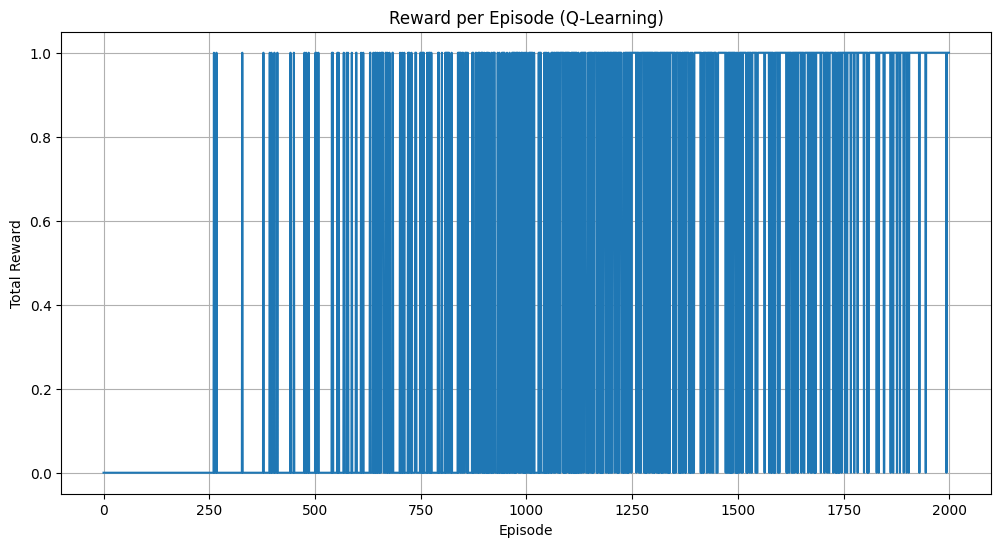

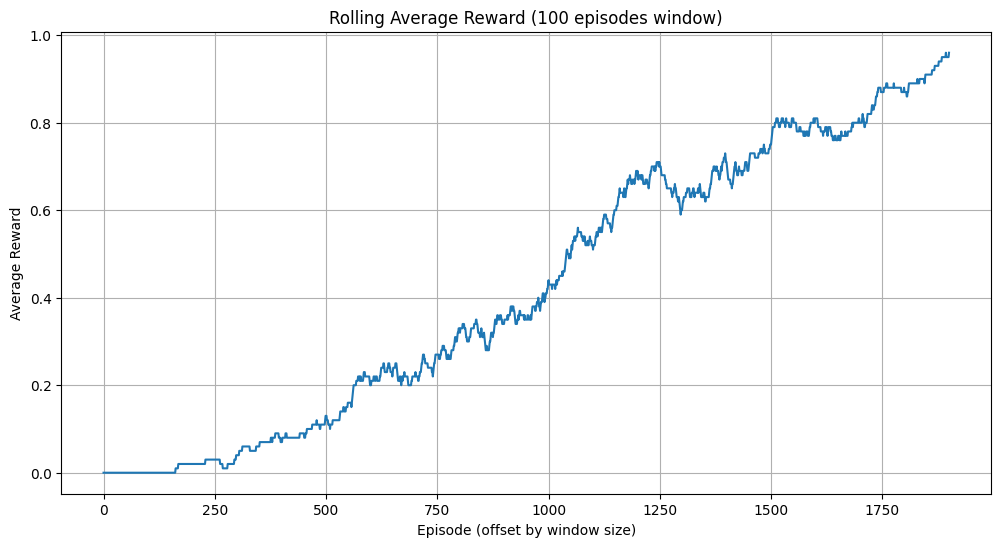

In [2]:
import torch
import numpy as np
import gymnasium as gym # 使用 gymnasium 替代 gym
import matplotlib.pyplot as plt # 用于绘图

# 1. 配置设备 (CPU 或 GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. 定义 Q-Learning 参数
learning_rate = 0.1
gamma = 0.99 # 折扣因子

# 探索策略参数 (ε-greedy)
epsilon_start = 1.0  # 初始探索率，从纯探索开始
epsilon_end = 0.1    # 最终探索率，保持一定的探索
# 可以选择线性衰减或指数衰减
# 线性衰减：epsilon 每次减少一个固定值
epsilon_decay_linear = 0.0005 # 每次减少 0.0005
# 指数衰减：epsilon 每次乘以一个因子
# epsilon_decay_factor = 0.995 # 每次乘以 0.995

num_episodes = 2000

# 3. 创建环境
# FrozenLake-v1 是一个离散状态、离散动作的环境
# is_slippery=False 使环境确定性更高，方便演示
env = gym.make("FrozenLake-v1", is_slippery=False)
# env = gym.make("FrozenLake-v1", is_slippery=True) # 可以尝试更难的滑动版本
num_states = env.observation_space.n
num_actions = env.action_space.n

# 4. 初始化 Q 表 (在 PyTorch 中使用 tensor)
# 将 Q 表直接放到选择的设备上
q_table = torch.zeros((num_states, num_actions), device=device)
# 也可以尝试小的随机初始化，但这通常不是主要问题所在
# q_table = torch.randn((num_states, num_actions), device=device) * 0.01

# 5. Q-Learning 训练循环
rewards_per_episode = []
current_epsilon = epsilon_start # 追踪当前的 epsilon 值

for episode in range(num_episodes):
    state, info = env.reset() # env.reset() 现在返回 (observation, info)
    state = torch.tensor(state, dtype=torch.long, device=device) # 确保状态在设备上
    done = False
    truncated = False # 新增的截断标志
    episode_reward = 0

    while not done and not truncated:
        # ε-贪婪策略选择动作
        if np.random.uniform(0, 1) < current_epsilon:
            action = env.action_space.sample() # 探索
        else:
            # 如果 Q 表全为0，argmax 会返回第一个动作，可能导致不探索
            # 更安全的做法是，如果 Q 值都相同，则随机选择
            if torch.all(q_table[state, :] == q_table[state, 0]): # 如果所有Q值都相同
                action = env.action_space.sample() # 随机选择
            else:
                action = torch.argmax(q_table[state, :]).item() # 利用

        # 执行动作
        next_state, reward, done, truncated, info = env.step(action)
        next_state = torch.tensor(next_state, dtype=torch.long, device=device)
        reward = torch.tensor(reward, dtype=torch.float32, device=device)

        # Q-Learning 更新规则
        # 获取当前Q值
        current_q = q_table[state, action]

        # 计算下一状态的最大Q值 (如果达到终止状态，max_q_next 为 0)
        # 注意：这里 Q_table 里的 next_state 也要确保是 long 类型索引
        max_q_next = torch.max(q_table[next_state, :]) if not (done or truncated) else torch.tensor(0.0, device=device)

        # TD 目标
        td_target = reward + gamma * max_q_next

        # 更新 Q 值
        q_table[state, action] = current_q + learning_rate * (td_target - current_q)

        state = next_state
        episode_reward += reward.item()

    rewards_per_episode.append(episode_reward)

    # 衰减 epsilon
    current_epsilon = max(epsilon_end, current_epsilon - epsilon_decay_linear) # 线性衰减
    # current_epsilon = max(epsilon_end, current_epsilon * epsilon_decay_factor) # 指数衰减

    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{num_episodes}, Reward: {episode_reward:.2f}, Epsilon: {current_epsilon:.4f}")

env.close()

# 6. 结果展示
print("\nTraining Finished.")
# 移回 CPU 进行打印，否则在 CPU 环境下运行可能会报 cuda 错误
print(f"Final Q-table (on {device}):\n{q_table.cpu().numpy()}") 

# 简单的性能评估
# 计算最后100个episode的平均奖励
avg_reward_last_100 = np.mean(rewards_per_episode[-100:])
print(f"Average reward over last 100 episodes: {avg_reward_last_100:.2f}")

# 绘图展示训练过程
plt.figure(figsize=(12, 6))
plt.plot(rewards_per_episode)
plt.title("Reward per Episode (Q-Learning)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()

# 滑动平均奖励
# 使用更长的窗口，比如 50 或 100，来平滑曲线
window_size = 100
if len(rewards_per_episode) >= window_size:
    rolling_average = np.convolve(rewards_per_episode, np.ones(window_size)/window_size, mode='valid')
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_average)
    plt.title(f"Rolling Average Reward ({window_size} episodes window)")
    plt.xlabel("Episode (offset by window size)")
    plt.ylabel("Average Reward")
    plt.grid(True)
    plt.show()
else:
    print(f"Not enough episodes for a rolling average of window size {window_size}.")

### 2.2 深度Q网络（Deep Q-Network, DQN）

传统的Q-Learning在状态空间或动作空间非常大时会遇到**维度灾难（curse of dimensionality）**。例如，对于Atari游戏，原始像素作为状态输入将导致天文数字般的状态数量，Q表将无法存储和更新。

**DeepMind在2013年**提出了**Deep Q-Network (DQN)**，将深度学习（特别是卷积神经网络，CNN）与Q-Learning结合，克服了这一瓶颈。DQN的核心思想是使用**深度神经网络来近似Q函数**，即$Q(s, a, \mathbf{w}) \approx Q^*(s, a)$，其中$\mathbf{w}$是神经网络的权重参数。

DQN的损失函数基于贝尔曼最优方程，可以看作是对**TD误差**进行平方来最小化：
$$\text{loss} = \left(r + \gamma \max_{a'} Q(s', a', \mathbf{w}^-) - Q(s, a, \mathbf{w})\right)^2$$
其中，$\mathbf{w}$是当前Q网络的参数，$\mathbf{w}^-$是**目标Q网络（Target Q-network）**的参数。

**DQN的主要改进及其原因：**
在DQN之前，所有尝试用深度神经网络进行Q-Learning的方法都失败了，主要原因在于训练的不稳定性：
1.  **奖励与Q值的尺度未知**：导致反向传播算法难以收敛。
2.  **连续输入的关联性**：连续的环境观测（如视频帧）之间差异很小，具有很强的相关性，这违反了深度学习中独立同分布（i.i.d.）数据的假设，导致算法容易收敛到局部最优或震荡。
3.  **Q值微小变化导致策略剧烈抖动**：Q值函数中的微小更新可能导致策略发生巨大变化（从一个极端到另一个极端），使得训练不稳定。

**DeepMind的解决方案：**
为了解决这些不稳定性问题，DQN引入了以下关键技术：

1.  **奖励裁剪（Clip rewards）或自适应归一化**：将奖励裁剪到固定的范围（如-1到1），或自适应地归一化网络输出到合理的范围。这有助于稳定训练过程。
2.  **经验回放（Experience Replay）**：智能体与环境交互产生的`$(s, a, r, s')$`样本被存储在**回放缓冲区（Replay Buffer）**中。在训练时，随机从缓冲区中采样一批经验用于训练。
    *   **优点**：
        *   **打破数据关联性**：通过随机采样，使得训练样本不再是连续的，从而近似满足i.i.d.假设，稳定了训练。
        *   **提高数据利用效率**：每个经验都可以被多次用于训练，提高了样本效率。
3.  **冻结目标Q网络（Freeze Target Q-network）**：使用两个Q网络：
    *   **当前Q网络（Online Q-network）**：用于选择动作和计算当前Q值，其参数$\mathbf{w}$在每次训练迭代中更新。
    *   **目标Q网络（Target Q-network）**：用于计算TD目标中的未来Q值（$\max_{a'} Q(s', a', \mathbf{w}^-)$），其参数$\mathbf{w}^-$会周期性地（例如，每C个训练步）从当前Q网络复制过来，但在训练过程中保持冻结。
    *   **优点**：解耦了目标值的计算与当前Q网络的更新，使得目标值更加稳定，避免了Q值自举（bootstrapping）带来的不稳定震荡。

这些改进使得DQN在Atari游戏上取得了超越人类的表现，并在2015年发表于《Nature》杂志，成为DRL领域的里程碑。

**后续改进 (2015年之后):**
DeepMind继续对DQN进行了多项重要改进，这些方法通常可以叠加使用：
1.  **优先级经验回放（Prioritized Experience Replay）**：根据经验的TD误差（表示“惊喜度”或重要性）来加权采样，使得误差大的经验有更高的概率被回放，从而加速学习。
2.  **双重DQN（Double DQN, DDQN）**：解决了Q值过高估计的问题。它使用当前Q网络选择动作，但使用目标Q网络来评估该动作的Q值，即：
    $$\text{TD Target} = r + \gamma Q(s', \arg\max_{a'} Q(s', a', \mathbf{w}), \mathbf{w}^-)$$
3.  **对决网络（Dueling Network Architectures for DQN）**：将Q网络结构分解为价值流（state-value stream）和优势流（advantage stream），再聚合得到Q值。这使得网络能够独立地学习状态的价值以及每个动作的优势，提高了对环境中不同动作价值的估计精度。

**PyTorch DQN 示例 (针对 CartPole 环境):**

Using device: cuda
Episode 1/500, Reward: 28.0, Epsilon: 1.00
Episode 2/500, Reward: 64.0, Epsilon: 0.86
Episode 3/500, Reward: 30.0, Epsilon: 0.74
Episode 4/500, Reward: 15.0, Epsilon: 0.69
Episode 5/500, Reward: 11.0, Epsilon: 0.65
Episode 6/500, Reward: 14.0, Epsilon: 0.61
Episode 7/500, Reward: 26.0, Epsilon: 0.53
Episode 8/500, Reward: 19.0, Epsilon: 0.49
Episode 9/500, Reward: 12.0, Epsilon: 0.46
Episode 10/500, Reward: 17.0, Epsilon: 0.42
Episode 11/500, Reward: 14.0, Epsilon: 0.39
Episode 12/500, Reward: 19.0, Epsilon: 0.36
Episode 13/500, Reward: 9.0, Epsilon: 0.34
Episode 14/500, Reward: 14.0, Epsilon: 0.32
Episode 15/500, Reward: 16.0, Epsilon: 0.29
Episode 16/500, Reward: 30.0, Epsilon: 0.25
Episode 17/500, Reward: 27.0, Epsilon: 0.22
Episode 18/500, Reward: 10.0, Epsilon: 0.21
Episode 19/500, Reward: 35.0, Epsilon: 0.18
Episode 20/500, Reward: 22.0, Epsilon: 0.16
Episode 21/500, Reward: 27.0, Epsilon: 0.14
Episode 22/500, Reward: 29.0, Epsilon: 0.12
Episode 23/500, Reward:

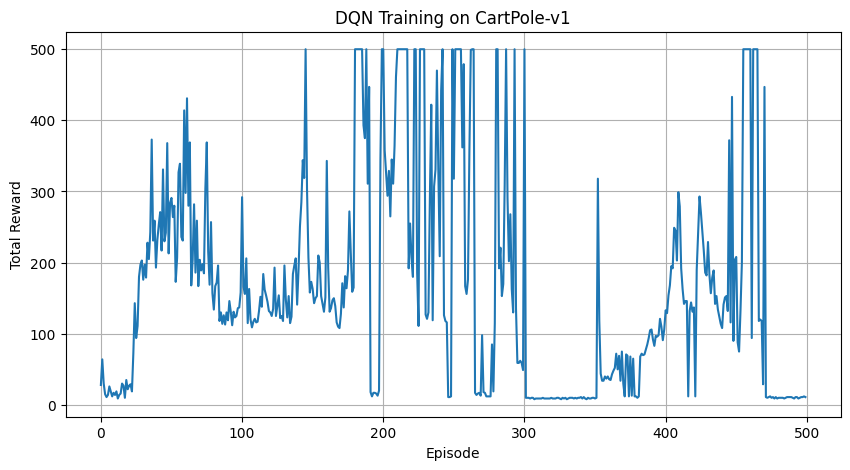

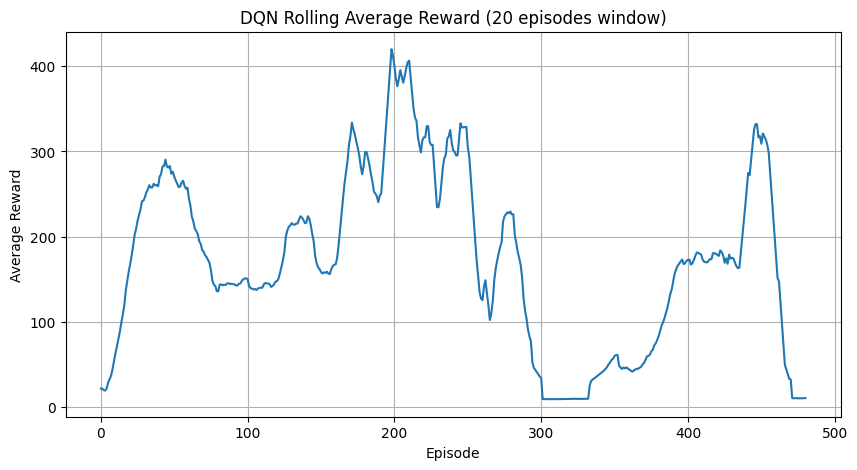

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import gymnasium as gym
from collections import deque
import random
import matplotlib.pyplot as plt

# 1. 配置设备 (CPU 或 GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. 定义 Q 网络
class DQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# 3. 定义经验回放缓冲区
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        # 将数据转换为 tensor，并移动到设备上
        state = torch.tensor(state, dtype=torch.float32, device=device)
        action = torch.tensor(action, dtype=torch.long, device=device)
        reward = torch.tensor(reward, dtype=torch.float32, device=device)
        next_state = torch.tensor(next_state, dtype=torch.float32, device=device)
        done = torch.tensor(done, dtype=torch.bool, device=device)
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        # 将批量的 tensor 堆叠起来
        return torch.stack(states), torch.stack(actions), torch.stack(rewards), torch.stack(next_states), torch.stack(dones)

    def __len__(self):
        return len(self.buffer)

# 4. 定义 DQN 智能体
class DQNAgent:
    def __init__(self, state_dim, action_dim, gamma, lr, epsilon_start, epsilon_end, epsilon_decay, buffer_capacity, batch_size, target_update_freq):
        self.action_dim = action_dim
        self.gamma = gamma # 折扣因子
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay # ε衰减率

        # 当前 Q 网络和目标 Q 网络，都放到设备上
        self.policy_net = DQN(state_dim, action_dim).to(device)
        self.target_net = DQN(state_dim, action_dim).to(device)
        self.target_net.load_state_dict(self.policy_net.state_dict()) # 初始同步
        self.target_net.eval() # 目标网络不进行训练

        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=lr)
        self.memory = ReplayBuffer(buffer_capacity)
        self.batch_size = batch_size
        self.target_update_freq = target_update_freq
        self.steps_done = 0 # 记录步数用于ε衰减和目标网络更新

    def select_action(self, state):
        # 确保状态是浮点型 tensor 且在设备上
        state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0) # 添加 batch 维度
        
        # ε-贪婪策略
        if random.random() < self.epsilon:
            return random.randrange(self.action_dim)
        else:
            with torch.no_grad(): # 不计算梯度，仅用于推理
                q_values = self.policy_net(state)
                return q_values.argmax(1).item()

    def update_policy(self):
        if len(self.memory) < self.batch_size:
            return # 经验不足，不更新

        states, actions, rewards, next_states, dones = self.memory.sample(self.batch_size)

        # 计算当前 Q 值：Q(s, a)
        # gather(1, actions.unsqueeze(1)) 确保选择正确的动作对应的Q值
        current_q_values = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)

        # 计算目标 Q 值：r + γ * max_a' Q_target(s', a')
        # target_net.eval() 确保在评估模式，不影响BN/Dropout
        with torch.no_grad(): # 目标 Q 值不需要梯度
            next_q_values = self.target_net(next_states).max(1)[0] # max(1)[0] 返回每行的最大值
            # 如果是终止状态，td_target 中的下一状态 Q 值为 0
            td_target = rewards + self.gamma * next_q_values * (~dones) # ~dones 表示非终止状态

        # 计算损失
        loss = F.mse_loss(current_q_values, td_target)

        # 反向传播和优化
        self.optimizer.zero_grad()
        loss.backward()
        # 梯度裁剪，防止梯度爆炸，提高稳定性
        for param in self.policy_net.parameters():
            param.grad.data.clamp_(-1, 1)
        self.optimizer.step()

        # 更新 ε 值
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)
        self.steps_done += 1

        # 周期性更新目标网络
        if self.steps_done % self.target_update_freq == 0:
            self.target_net.load_state_dict(self.policy_net.state_dict())

# 5. 训练主循环
env = gym.make("CartPole-v1")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

agent = DQNAgent(
    state_dim=state_dim,
    action_dim=action_dim,
    gamma=0.99,
    lr=0.001,
    epsilon_start=1.0,
    epsilon_end=0.01,
    epsilon_decay=0.995,
    buffer_capacity=10000,
    batch_size=64,
    target_update_freq=100
)

num_episodes = 500
episode_rewards = []

for episode in range(num_episodes):
    state, info = env.reset()
    done = False
    truncated = False
    episode_reward = 0

    while not done and not truncated:
        action = agent.select_action(state)
        next_state, reward, done, truncated, info = env.step(action)
        
        # 储存经验
        agent.memory.push(state, action, reward, next_state, done or truncated) # 如果 done 或 truncated 都算回合结束

        state = next_state
        episode_reward += reward

        # 学习
        agent.update_policy()

    episode_rewards.append(episode_reward)
    print(f"Episode {episode + 1}/{num_episodes}, Reward: {episode_reward}, Epsilon: {agent.epsilon:.2f}")

env.close()

# 6. 结果可视化
plt.figure(figsize=(10, 5))
plt.plot(episode_rewards)
plt.title("DQN Training on CartPole-v1")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()

# 计算滑动平均奖励
rolling_average = np.convolve(episode_rewards, np.ones(20)/20, mode='valid')
plt.figure(figsize=(10, 5))
plt.plot(rolling_average)
plt.title("DQN Rolling Average Reward (20 episodes window)")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()

## 三、基于策略的强化学习：策略梯度

### 3.1 策略的定义与类型

在基于策略的强化学习中，智能体直接学习**策略（Policy, $\pi$）**。策略是从状态到动作的映射，它决定了在给定状态下智能体应该采取什么动作。

策略可以是**确定性策略（Deterministic Policy）**：
$$a = \pi(s)$$
这意味着在每个状态下，策略会确定性地选择一个唯一的动作。

策略也可以是**随机性策略（Stochastic Policy）**：
$$\pi(a|s) = P(a|s)$$
这意味着在每个状态下，策略会输出一个动作的概率分布，智能体根据这个分布采样一个动作。随机性策略有助于探索环境。

**“房间里的机器人”示例（政策行为分析）：**

该系列例子清晰地展示了环境模型和奖励结构对最优策略的巨大影响。机器人需要从起点（START）移动到目标格子（+1奖励）或避免陷阱格子（-1惩罚）。每走一步都会有小的惩罚（例如-0.04），这鼓励智能体尽快完成任务。

*   **确定性世界（Deterministic World），每步奖励-0.04：** 机器人总是选择最短路径到达+1格子，因为其动作是100%可靠的。
*   **随机性世界（Stochastic World），每步奖励-0.04：** 动作不再是100%可靠的，例如，如果机器人选择“向上”，有80%的概率向上，10%的概率向左，10%的概率向右。在这种情况下，最优策略会**避开-1格子旁边的“向上”动作**，因为即使主方向是远离-1格子，仍有小概率“滑”入陷阱，风险过高。策略会选择一条稍微长一点但更安全的路径。
*   **随机性世界，每步奖励-2：** 如果每步惩罚变得非常大，那么机器人会**不惜一切代价选择最短路径**，即使这意味着冒更大的风险滑入-1格子，因为路径越长意味着累积惩罚越大。
*   **随机性世界，每步奖励-0.1 vs -0.04：** 奖励值决定了“紧急度”。每步惩罚越大（例如-0.1），智能体就越“着急”完成任务，可能更倾向于走有风险但更短的路径。每步惩罚越小（例如-0.04），智能体就有更多“闲暇”选择更安全的路径。
*   **随机性世界，每步奖励+0.01：** 如果每步都有小的奖励，智能体的目标就变为**尽可能长时间地在环境中停留**，同时避开陷阱，因为每一步都能获得正回报。这会导致智能体选择最长路径，而不是最短路径。

**从这些例子中得到的教训：**
1.  **环境模型对最优策略有巨大影响。** 无论是确定性还是随机性，环境的动力学决定了智能体如何行动。
2.  **奖励结构对最优策略有巨大影响。** 即时奖励的大小和符号直接塑造了智能体的行为偏好，决定了它是趋利避害、快速完成还是长期探索。

### 3.2 策略梯度（Policy Gradient）- Actor

在策略梯度方法中，**Actor（执行者）**通常是一个深度神经网络。
*   **输入**：智能体从环境中观察到的状态（可以是向量或图像矩阵）。
*   **输出**：每个动作对应的概率（对于离散动作空间）或动作的参数（对于连续动作空间）。对于离散动作，输出层通常使用softmax激活函数来表示概率分布。

智能体根据神经网络输出的概率分布**采样（Sample）**一个动作。

**Actor的“优劣”评估：**
一个Actor的好坏，体现在它在游戏中的表现，即它获得的**总奖励**。
$$R = \sum_{t=1}^T r_t$$
这里的总奖励$R$是一个随机变量，即使使用相同的Actor，由于环境的随机性或策略本身的随机性，每次玩游戏（一个回合，episode）得到的总奖励都可能不同。因此，我们关注的是**期望总奖励** $\bar{R}_{\theta^\pi}$：
$$\bar{R}_{\theta^\pi} = E[R]$$
我们的目标是调整Actor神经网络的参数$\theta^\pi$，使得期望总奖励最大化。

**策略梯度定理：**
为了最大化$\bar{R}_{\theta^\pi}$，我们使用梯度上升（Gradient Ascent）的方法来更新参数：
$$\theta^\pi \leftarrow \theta^\pi + \eta \nabla \bar{R}_{\theta^\pi}$$
其中，$\eta$是学习率。
策略梯度定理给出了$\nabla \bar{R}_{\theta^\pi}$的表达式：
$$\nabla \bar{R}_{\theta^\pi} \approx \frac{1}{N} \sum_{n=1}^N R(\tau^n) \nabla \log P(\tau^n | \theta^\pi)$$
其中：
*   $N$是采样到的回合（trajectories）数量。
*   $\tau^n$表示第$n$个回合的轨迹，即一系列状态-动作-奖励序列。
*   $R(\tau^n)$是第$n$个回合的总奖励。
*   $P(\tau^n | \theta^\pi)$ 是在参数$\theta^\pi$下生成轨迹$\tau^n$的概率。

进一步展开，$P(\tau^n | \theta^\pi)$ 是轨迹中所有状态转移概率和策略动作概率的乘积。由于状态转移概率与$\theta^\pi$无关，我们可以将梯度表示为：
$$\nabla \bar{R}_{\theta^\pi} \approx \frac{1}{N} \sum_{n=1}^N \sum_{t=1}^{T_n} R(\tau^n) \nabla \log \pi(a_t^n | s_t^n, \theta^\pi)$$
这个公式的含义是：
*   对于一个好的轨迹（$R(\tau^n)$为正），我们增加其中所有动作的概率。
*   对于一个坏的轨迹（$R(\tau^n)$为负），我们减少其中所有动作的概率。

**重要提示：** 这里的$R(\tau^n)$是**整个回合的累积奖励**，而不是即时奖励$r_t^n$。这意味着，即使某个动作$a_t^n$在当下获得了正奖励，如果它导致了后续的糟糕结果（使得整个回合总奖励为负），那么该动作的概率也会被降低。反之亦然。这强调了强化学习的**长期回报**特性。

**PyTorch 策略梯度 (REINFORCE) 示例 (针对 CartPole 环境):**

Using device: cuda
Episode 50/1000, Reward: 57.00
Episode 100/1000, Reward: 55.00
Episode 150/1000, Reward: 500.00
Episode 200/1000, Reward: 500.00
Episode 250/1000, Reward: 500.00
Episode 300/1000, Reward: 500.00
Episode 350/1000, Reward: 500.00
Episode 400/1000, Reward: 500.00
Episode 450/1000, Reward: 144.00
Episode 500/1000, Reward: 500.00
Episode 550/1000, Reward: 500.00
Episode 600/1000, Reward: 500.00
Episode 650/1000, Reward: 500.00
Episode 700/1000, Reward: 500.00
Episode 750/1000, Reward: 500.00
Episode 800/1000, Reward: 500.00
Episode 850/1000, Reward: 500.00
Episode 900/1000, Reward: 85.00
Episode 950/1000, Reward: 500.00
Episode 1000/1000, Reward: 500.00


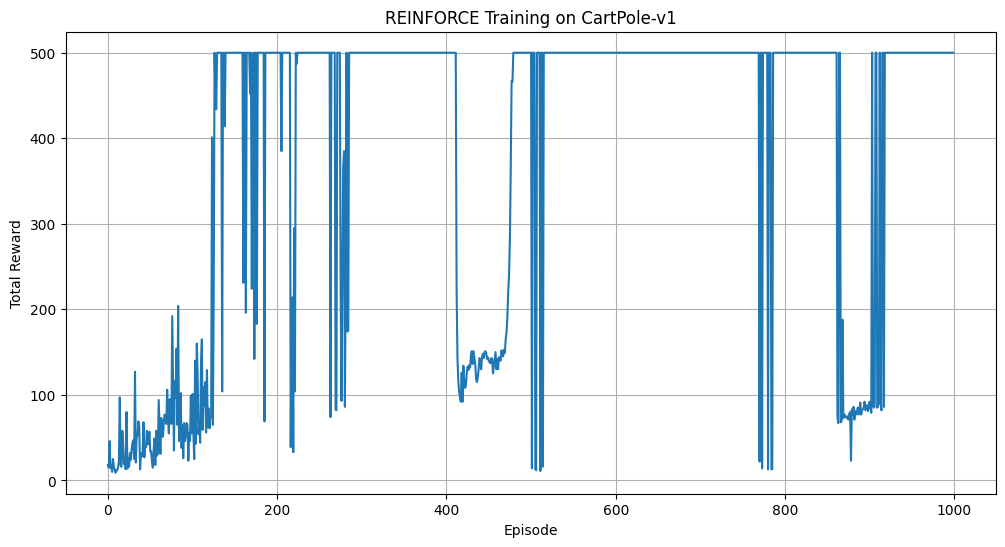

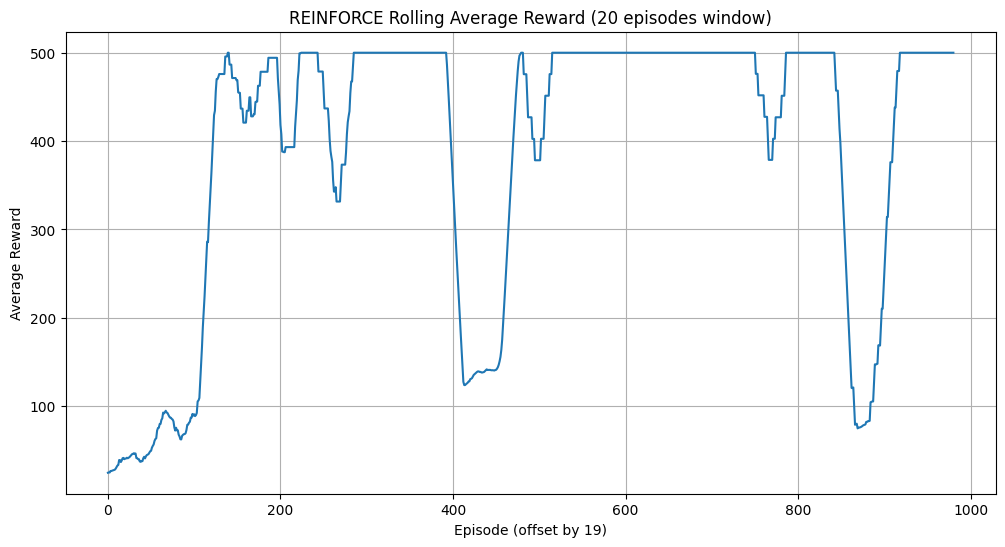

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# 1. 配置设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. 定义策略网络 (Actor)
class PolicyNet(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(PolicyNet, self).__init__()
        self.fc1 = nn.Linear(state_dim, 128)
        self.fc2 = nn.Linear(128, action_dim) # 输出是动作的 logits

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x) # 不直接加 softmax，因为交叉熵损失函数内部会处理

    def select_action(self, state):
        # 确保状态是浮点型 tensor 且在设备上
        # state 输入可能来自 gym.Env.reset() 或 gym.Env.step()，通常是 numpy 数组
        # 需要将其转换为 PyTorch tensor 并添加 batch 维度 (unsqueeze(0))
        state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
        
        # 计算动作的 logits
        logits = self.forward(state_tensor)
        
        # 使用 Categorical 分布进行采样
        m = torch.distributions.Categorical(logits=logits)
        action = m.sample()
        
        # 返回动作的索引和其对数概率，以便计算策略梯度
        # .item() 将单个 tensor 转换为 Python 数字
        return action.item(), m.log_prob(action)

# 3. 定义 REINFORCE 智能体
class ReinforceAgent:
    def __init__(self, state_dim, action_dim, lr, gamma):
        self.policy_net = PolicyNet(state_dim, action_dim).to(device)
        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=lr)
        self.gamma = gamma # 折扣因子

        self.log_probs = [] # 存储每个时间步的动作对数概率
        self.rewards = []   # 存储每个时间步的奖励

    def store_transition(self, log_prob, reward):
        # 确保存储的 log_prob 也是在设备上的 tensor
        self.log_probs.append(log_prob)
        # 确保存储的 reward 也是在设备上的 tensor
        self.rewards.append(torch.tensor(reward, dtype=torch.float32, device=device))

    def learn(self):
        # 计算折扣累积奖励 (G_t)
        discounted_rewards = []
        R = 0
        for r in self.rewards[::-1]: # 从后向前计算
            R = r + self.gamma * R
            discounted_rewards.insert(0, R) # 插入到列表头部

        # 将奖励转换为 tensor 并归一化 (可选，但通常有助于稳定训练)
        # 注意：discounted_rewards 已经是 PyTorch tensor 列表，不需要再次转换
        discounted_rewards = torch.stack(discounted_rewards) # 将列表堆叠成一个 tensor
        
        # 归一化奖励
        if len(discounted_rewards) > 1:
            discounted_rewards = (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-9)

        # 计算策略梯度损失
        # loss = - sum(log_prob * G_t)
        policy_loss = []
        # 确保 log_probs 也是一个 tensor
        log_probs_tensor = torch.cat(self.log_probs) # 将 log_prob 列表拼接成一个 tensor

        for log_prob_t, G_t in zip(log_probs_tensor, discounted_rewards):
            policy_loss.append(-log_prob_t * G_t) # 负号因为我们做的是梯度下降

        self.optimizer.zero_grad()
        loss = torch.sum(torch.stack(policy_loss)) # 将所有损失拼接并求和
        loss.backward()
        self.optimizer.step()

        # 清空当前回合的数据
        self.log_probs = []
        self.rewards = []

# 4. 训练主循环
env = gym.make("CartPole-v1")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

agent = ReinforceAgent(
    state_dim=state_dim,
    action_dim=action_dim,
    lr=0.01,
    gamma=0.99
)

num_episodes = 1000
episode_rewards = []

for episode in range(num_episodes):
    state, info = env.reset()
    done = False
    truncated = False
    episode_reward = 0

    while not done and not truncated:
        # 修正的地方：通过 policy_net 调用 select_action
        action, log_prob = agent.policy_net.select_action(state)
        next_state, reward, done, truncated, info = env.step(action)
        
        agent.store_transition(log_prob, reward) # 储存当前时间步的 log_prob 和 reward

        state = next_state
        episode_reward += reward

    episode_rewards.append(episode_reward)
    agent.learn() # 每个回合结束时进行一次学习更新

    if (episode + 1) % 50 == 0: # 每50个回合打印一次
        print(f"Episode {episode + 1}/{num_episodes}, Reward: {episode_reward:.2f}")

env.close()

# 5. 结果可视化
plt.figure(figsize=(12, 6))
plt.plot(episode_rewards)
plt.title("REINFORCE Training on CartPole-v1")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()

# 滑动平均奖励
window_size = 20
if len(episode_rewards) >= window_size:
    rolling_average = np.convolve(episode_rewards, np.ones(window_size)/window_size, mode='valid')
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_average)
    plt.title(f"REINFORCE Rolling Average Reward ({window_size} episodes window)")
    plt.xlabel(f"Episode (offset by {window_size - 1})")
    plt.ylabel("Average Reward")
    plt.grid(True)
    plt.show()
else:
    print(f"Not enough episodes for a rolling average of window size {window_size}.")

## 四、基于价值与基于策略的结合：Actor-Critic 与 A3C

策略梯度方法存在**高方差（high variance）**的问题，即每次更新的梯度估计可能很不稳定，导致训练过程缓慢且效率低下。为了解决这个问题，研究者引入了**Actor-Critic**框架。

### 4.1 Critic 的作用

**评论家（Critic）**在Actor-Critic框架中扮演一个评估者的角色。它不直接决定动作，而是**评估当前Actor（策略）的好坏**。Critic通常学习**状态价值函数（State Value Function）** $V^\pi(s)$，它表示在状态`s`下，遵循策略$\pi$所能获得的预期未来累积奖励。

$$V^\pi(s) = E[R_t | s_t = s, \pi]$$

当使用Actor $\pi$时，累积奖励的期望值是通过观察状态`s`后获得的。

**估计 $V^\pi(s)$ 的方法：**

1.  **蒙特卡洛方法（Monte-Carlo based approach）**：
    *   智能体遵循策略$\pi$完成一个完整的Episode。
    *   在Episode结束后，计算每个状态的**实际累积回报（Return）**，然后用这些回报的平均值来估计该状态的价值。
    *   **优点**：无偏估计。
    *   **缺点**：必须等到Episode结束才能更新，对于长Episode效率低，方差较大。

2.  **时序差分方法（Temporal-Difference, TD approach）**：
    *   TD方法不需要等到Episode结束。它利用**自举（bootstrapping）**的思想，即用当前估计的下一个状态的价值来更新当前状态的价值。
    *   TD更新规则：$V(s_t) \leftarrow V(s_t) + \alpha [r_{t+1} + \gamma V(s_{t+1}) - V(s_t)]$。
    *   **优点**：可以在每个时间步进行更新，效率更高；方差通常小于蒙特卡洛方法。
    *   **缺点**：有偏估计（因为它依赖于自身对未来价值的估计）。

**MC vs. TD：**
*   MC方法依赖于完整的回报，方差高但无偏。
*   TD方法依赖于下一个状态的估计值，方差低但有偏。
在实践中，TD方法由于其效率和较低的方差而更常被使用。

### 4.2 Actor-Critic 框架

Actor-Critic框架结合了策略梯度（Actor）和价值函数估计（Critic）。
*   **Actor**：一个策略网络$\pi(a|s; \theta^\pi)$，负责选择动作。
*   **Critic**：一个价值网络$V^\pi(s; \theta^v)$，负责评估Actor的策略，通常估计状态价值函数。

两者相互协作：Critic评估Actor的当前表现，并提供反馈信号来指导Actor的参数更新。Actor则根据Critic的反馈调整策略，以提高表现。

### 4.3 优势Actor-Critic（Advantage Actor-Critic, A2C/A3C）

为了进一步降低策略梯度的方差，Actor-Critic框架引入了**优势函数（Advantage Function）**。
优势函数$A(s, a)$衡量了在特定状态`s`下采取某个动作`a`相对于该状态下平均表现的“优势”：
$$A^\pi(s, a) = Q^\pi(s, a) - V^\pi(s)$$
直观理解，如果$A^\pi(s,a) > 0$，说明动作`a`比在该状态下执行所有可能动作的平均效果要好；如果$A^\pi(s,a) < 0$，则表示动作`a`比平均效果差。

然而，$Q^\pi(s,a)$本身需要估计。在TD方法中，$Q^\pi(s,a)$可以被TD目标 $r + \gamma V^\pi(s')$ 近似。因此，优势函数可以被估计为**TD误差**：
$$A^\pi(s_t, a_t) \approx r_{t+1} + \gamma V^\pi(s_{t+1}) - V^\pi(s_t)$$
这里，$r_{t+1} + \gamma V^\pi(s_{t+1})$可以看作是当前Q值$Q^\pi(s_t, a_t)$的无偏估计（即TD目标），而$V^\pi(s_t)$是基线（baseline），它用来**减小策略梯度的方差，而不改变梯度的期望**。

因此，策略梯度更新公式变为：
$$\nabla \bar{R}_{\theta^\pi} \approx \frac{1}{N} \sum_{n=1}^N \sum_{t=1}^{T_n} A^\pi(s_t^n, a_t^n) \nabla \log \pi(a_t^n | s_t^n, \theta^\pi)$$
其中，$A^\pi(s_t^n, a_t^n)$是Critic评估的优势值。

**共享参数：**
在实践中，Actor和Critic的网络参数可以共享。这意味着它们使用同一个神经网络的一部分来处理输入状态，然后分出两个不同的“头”：一个输出动作概率（Actor），另一个输出状态价值（Critic）。这通常能提高样本效率和训练稳定性。

**输出熵作为正则化：**
为了鼓励探索，通常会在策略梯度的损失函数中添加一个**熵正则化项（Entropy Regularization）**。
$$\text{Loss}_{\text{Actor}} = -\sum \log \pi(a|s) A(s,a) - \beta H(\pi(s))$$
其中，$H(\pi(s))$ 是策略在状态`s`下的熵，$\beta$是权重系数。
*   **高熵**意味着动作分布更随机，鼓励探索。
*   **低熵**意味着动作分布更确定，鼓励利用已知信息。
通过加入熵项，智能体被鼓励保持一定的探索能力，避免过早收敛到次优策略。

### 4.4 异步优势Actor-Critic（Asynchronous Advantage Actor-Critic, A3C）

**A3C**是DeepMind在2016年提出的，它通过**异步训练**进一步提高了Actor-Critic算法的效率和稳定性。A3C不再需要经验回放缓冲区，因为它通过多个并行智能体（或称“Worker”）在不同环境中同时探索，自然地实现了数据去相关性。

**A3C 的工作流程：**
1.  **全局网络（Global Network）**：一个共享的Actor-Critic模型，其参数是所有Worker共享的。
2.  **多个Worker**：每个Worker拥有一个独立的Actor-Critic模型（其参数是全局网络参数的副本），并在自己的环境副本中独立地与环境交互。
    *   **复制全局参数**：每个Worker周期性地从全局网络复制最新的参数。
    *   **采样数据**：Worker在自己的环境中执行动作，收集一系列经验（状态、动作、奖励、下一状态）。
    *   **计算梯度**：Worker根据其收集的经验，计算其本地模型的损失和梯度（包括策略梯度和价值函数梯度）。
    *   **异步更新全局模型**：Worker将其计算出的梯度**异步地**发送给全局网络，全局网络使用这些梯度来更新其参数。

**A3C的优点：**
*   **高并行度**：多个Worker同时收集数据和计算梯度，大大加速了训练过程。
*   **打破数据关联性**：由于多个Worker在不同的环境副本中并行探索，它们收集到的经验是高度去相关的，这避免了DQN中对经验回放缓冲区的需求，简化了实现。
*   **更高效的探索**：不同的Worker可能探索不同的状态空间区域，提高了整体的探索效率。
*   **鲁棒性**：异步更新使得训练更加稳定。

由于A3C的复杂性涉及到Python的多进程（`torch.multiprocessing`），这里不提供完整的可运行代码，而是展示一个**概念性的Actor-Critic网络结构**。

**概念性 PyTorch Actor-Critic 网络结构：**

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 1. 配置设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 2. 定义共享特征提取器和分离的 Actor/Critic 头
class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(ActorCritic, self).__init__()
        
        # 共享层 (特征提取器)
        self.common_fc1 = nn.Linear(state_dim, 128)
        self.common_fc2 = nn.Linear(128, 128)
        
        # Actor 头 (输出动作的 logits)
        self.actor_head = nn.Linear(128, action_dim)
        
        # Critic 头 (输出状态价值)
        self.critic_head = nn.Linear(128, 1)

    def forward(self, x):
        # 确保输入在设备上
        x = x.to(device) 
        
        # 共享特征提取
        x = F.relu(self.common_fc1(x))
        shared_features = F.relu(self.common_fc2(x))
        
        # Actor 输出
        action_logits = self.actor_head(shared_features)
        
        # Critic 输出
        state_value = self.critic_head(shared_features)
        
        return action_logits, state_value

# 示例使用
state_dim = 4 # CartPole
action_dim = 2 # CartPole

# 创建 ActorCritic 模型实例，并移动到设备上
model = ActorCritic(state_dim, action_dim).to(device)

# 假设一个状态输入
sample_state = torch.randn(1, state_dim) # 形状 (batch_size, state_dim)

# 前向传播
action_logits, state_value = model(sample_state)

print(f"Sample Action Logits (on {device}): {action_logits}")
print(f"Sample State Value (on {device}): {state_value}")

# 从动作 logits 获取概率分布并采样
action_probs = F.softmax(action_logits, dim=-1)
m = torch.distributions.Categorical(probs=action_probs)
action_sampled = m.sample()
log_prob_sampled = m.log_prob(action_sampled)

print(f"Sampled Action: {action_sampled.item()}")
print(f"Log Probability of sampled action: {log_prob_sampled.item()}")

# 如何计算损失 (概念性)
# 假设我们有真实的累积回报 G_t (或 TD 目标)
# 假设我们有实际采取的动作 actual_action
# 假设我们有下一个状态的价值 V_next

# 1. 计算优势 (Advantage)
# TD 目标 = r_t + gamma * V_next * (1 - done)
# advantage = TD_目标 - state_value
# (在实际训练中，这些是针对 batch 计算的)

# 2. Actor 损失
# policy_loss = -log_prob_sampled * advantage.detach() # .detach() 避免优势函数梯度反向传播到 Critic
# (通常还包括熵正则化项)
# entropy = m.entropy().mean()
# actor_loss = policy_loss - 0.01 * entropy # 0.01 是熵系数

# 3. Critic 损失 (MSE Loss)
# critic_loss = F.mse_loss(state_value.squeeze(-1), TD_目标)

# 4. 总损失
# total_loss = actor_loss + critic_loss

# 5. 反向传播
# optimizer.zero_grad()
# total_loss.backward()
# optimizer.step()

Using device: cuda
Sample Action Logits (on cuda): tensor([[-0.0834,  0.1473]], device='cuda:0', grad_fn=<AddmmBackward0>)
Sample State Value (on cuda): tensor([[-0.0237]], device='cuda:0', grad_fn=<AddmmBackward0>)
Sampled Action: 1
Log Probability of sampled action: -0.5844479203224182


**在A3C中，多个这样的`ActorCritic`模型实例作为Worker，它们独立地与环境交互，计算梯度，然后异步地更新一个位于CPU或GPU上的`Global Network`。**

---

总结来说，深度强化学习是机器学习领域的一个强大范式，它通过深度神经网络解决了传统强化学习在处理高维复杂任务时的挑战。从Q-Learning到DQN的引入，再到Actor-Critic和A3C的并行优化，每一步的进展都推动了智能体在复杂环境中学习和决策能力的提升。理解这些核心概念和技术，是深入探索DRL领域的关键。